In [63]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("G:/Projects/Gods Classification/Model to train/dataset/Train")
data_dir_test = pathlib.Path('G:/Projects/Gods Classification/Model to train/dataset/Test')
data_dir_train

WindowsPath('G:/Projects/Gods Classification/Model to train/dataset/Train')

In [65]:
image_count_train = len(list(data_dir_train.glob('*/*')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*')))
print(image_count_test)

2187
250


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [66]:
batch_size = 32
img_height = 200
img_width = 200

Use 80% of the images for training, and 20% for validation.

In [67]:
from keras.preprocessing.image import ImageDataGenerator

In [68]:
train_gen = ImageDataGenerator(rescale=1./255)

In [69]:
val_gen = ImageDataGenerator(rescale=1./255)

In [70]:
train_ds = train_gen.flow_from_directory(data_dir_train,batch_size=batch_size,target_size=(img_width,img_height),classes=['Hanuman','Ganesha','Shiva','Brahma','Vishnu'],class_mode='categorical',shuffle=True)

Found 2187 images belonging to 5 classes.


In [71]:
val_ds = val_gen.flow_from_directory(data_dir_test,batch_size=batch_size,target_size=(img_width,img_height),classes=['Hanuman','Ganesha','Shiva','Brahma','Vishnu'],class_mode='categorical',shuffle=True)

Found 246 images belonging to 5 classes.


In [90]:
model = Sequential([
    layers.Conv2D(16, 3, activation='relu',input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5,activation='softmax')
])

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)       

In [92]:
from keras import optimizers

In [96]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = 'adam',metrics = ['accuracy'])

In [97]:
optimizers.rmsprop_v2

<module 'keras.optimizer_v2.rmsprop' from 'c:\\users\\gowdh\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\keras\\optimizer_v2\\rmsprop.py'>

In [102]:
history = model.fit(
    train_ds,
    steps_per_epoch=20,
    epochs=20,
    validation_data=val_ds,
    validation_steps=5    
)

Epoch 1/20
20/20 [==============================] - 14s 686ms/step - loss: 0.2893 - accuracy: 0.8969 - val_loss: 0.9974 - val_accuracy: 0.7563
Epoch 2/20
20/20 [==============================] - 13s 678ms/step - loss: 0.2721 - accuracy: 0.9062 - val_loss: 1.0518 - val_accuracy: 0.7937
Epoch 3/20
20/20 [==============================] - 14s 724ms/step - loss: 0.2173 - accuracy: 0.9281 - val_loss: 0.9317 - val_accuracy: 0.7750
Epoch 4/20
20/20 [==============================] - 14s 691ms/step - loss: 0.1796 - accuracy: 0.9451 - val_loss: 1.0984 - val_accuracy: 0.8000
Epoch 5/20
20/20 [==============================] - 14s 691ms/step - loss: 0.1665 - accuracy: 0.9531 - val_loss: 0.9315 - val_accuracy: 0.8062
Epoch 6/20
20/20 [==============================] - 14s 722ms/step - loss: 0.2005 - accuracy: 0.9451 - val_loss: 1.1550 - val_accuracy: 0.7812
Epoch 7/20
20/20 [==============================] - 14s 703ms/step - loss: 0.1521 - accuracy: 0.9578 - val_loss: 0.8084 - val_accuracy: 0.8438

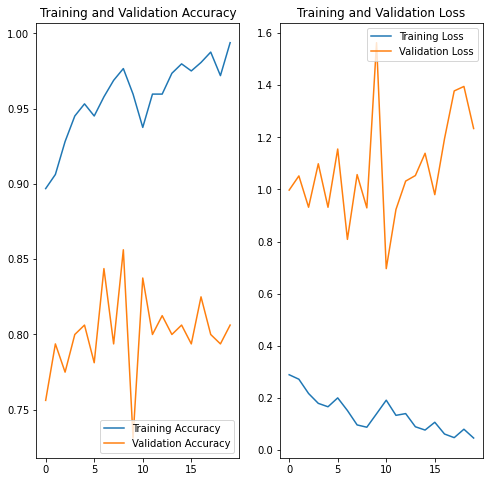

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
a = [1,2,3]

In [ ]:
a[0]+=1

In [18]:
confusion_dict = {}
for i in range(5):
    confusion_dict[i]=[0,0]
for run,batch in enumerate(val_ds):
    X,y = batch
    for i in range(len(X)):
        scaled_img = np.expand_dims(X[i],axis=0)
        value = np.argmax(y[i])
        if np.argmax(model.predict(scaled_img))==value:
            confusion_dict[value][0]+=1
        else:
            confusion_dict[value][1]+=1
    if run>4:
        break

In [19]:
confusion_dict

{0: [33, 7], 1: [28, 14], 2: [27, 8], 3: [20, 19], 4: [34, 2]}

In [ ]:
(val_ds.cl)

In [26]:
confusion_dict.values

<function dict.values>

In [27]:
n = 0
d = 0
for key in confusion_dict:
    n += confusion_dict[key][0]
    d += confusion_dict[key][0]+confusion_dict[key][1]

In [28]:
n/(d)

0.7395833333333334

In [53]:
classes = ['Hanuman','Ganesha','Shiva','Brahma','Vishnu']

In [61]:
for run,batch in enumerate(val_ds):
    X,y = batch
    index = np.random.randint(1,31)
    print(X.shape)
    img = (X[index])
    label = np.argmax(y[index])
    print(img.shape)
    break

(32, 200, 200, 3)
(200, 200, 3)


Actual: Vishnu
Predicted: Vishnu


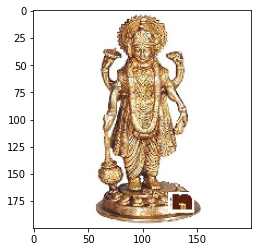

In [62]:
print("Actual: "+classes[label])
print("Predicted: "+classes[np.argmax(model.predict(np.expand_dims(img,axis=0)))])
plt.imshow(img)

In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='validation',color_mode = 'rgb',batch_size=batch_size,image_size=(img_width,img_height),seed=123)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='training', color_mode = 'rgb',batch_size=batch_size,image_size=(img_width,img_height),seed=123)

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch)
    print(labels_batch)    

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
class_names = training.class_names
print(class_names)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [2]:
import numpy as np

In [7]:
bin_weights = np.ones((5,5))
bin_weights[0, 1:5] = 2
bin_weights[1, 0] = 5

In [10]:
bin_weights

array([[1., 2., 2., 2., 2.],
       [5., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:
np.fill_diagonal(bin_weights,0)

In [12]:
bin_weights

array([[0., 2., 2., 2., 2.],
       [5., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [74]:
values = np.array([0.0,0.0,0.2,0.0,0.8])

In [75]:
best_thresh = [0.1,0.2,0.7,0.3,0.9]

In [77]:
best_thresh = np.array(best_thresh)
preference = np.argsort(best_thresh)[::-1]
for value in preference:
    flag = 0
    if value in np.where(values>best_thresh)[0]:
        flag = 1
        print(value)
        break
if flag==0:
    print(5)

5


In [84]:
np.where(values>best_thresh)[0].size


0

True